# Sarah Gutierez (23068) & Adrien Houpert (23247)

## Set up

In [133]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as f
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
from datetime import timedelta
import plotly.graph_objects as go
from pyspark.sql.window import Window
import numpy as np

In [134]:

spark_application_name = "Projet_AHSG"
spark = (SparkSession.builder.appName(spark_application_name).getOrCreate())
col = [StructField("Date",TimestampType()), StructField("High",FloatType()), StructField("Low",FloatType()), StructField("Open",FloatType()), StructField("Close",FloatType()), StructField("Volume",FloatType()), StructField("Adj Close",FloatType()), StructField("company_name",StringType())]
schema = StructType(col)

First we import all the data

In [135]:
amazon = spark.read.schema(schema).csv("stocks_data/AMAZON.csv", header=True, sep=',')
apple = spark.read.schema(schema).csv("stocks_data/APPLE.csv", header=True, sep=',')
facebook = spark.read.schema(schema).csv("stocks_data/FACEBOOK.csv", header=True, sep=',')
google = spark.read.schema(schema).csv("stocks_data/GOOGLE.csv", header=True, sep=',')
microsoft = spark.read.schema(schema).csv("stocks_data/MICROSOFT.csv", header=True, sep=',')
tesla = spark.read.schema(schema).csv("stocks_data/TESLA.csv", header=True, sep=',')
zoom = spark.read.schema(schema).csv("stocks_data/ZOOM.csv", header=True, sep=',')
all_data = {"Amazon": amazon, "Apple": apple, "Facebook": facebook, "Google": google, "Microsoft": microsoft, "Tesla": tesla, "Zoom": zoom}

## 1. Exploration

We get the first and last 40 lines

In [136]:
def head_tail_forty(df):
    print("HEAD:\n", df.head(40))
    print("TAIL:\n", df.tail(40))

We now look at the numbers of observations

In [137]:
def number_of_observations(df):
    print("Observations:", df.count())    

Here we get the period between the data points

In [138]:
def period_data(df):
    delta = df.head(2)[1].Date - df.head().Date 
    print("The period between the data points is", delta)

We show the descriptive statistics for each dataframe and each column

In [139]:
def stats_data(df):
    df.summary().show()

We check for missing data

In [140]:
def missing_data(df):
    df.select([f.count(f.when(f.isnull(c), c)).alias(c) for c in df.columns]).show()

Here we have the correlation matrix

In [183]:
def corr_values(df):
    col = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
    vec_col = "corr_features"
    vec_assembler = VectorAssembler(inputCols=col, outputCol=vec_col)
    df_vector = vec_assembler.transform(df).select(vec_col)
    mat = Correlation.corr(df_vector, vec_col)
    corr = mat.collect()[0][mat.columns[0]].toArray()
    print(corr)
    fig=plt.figure(234)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels([''] + col, rotation=45)
    ax.set_yticklabels([''] + col)
    cax=ax.matshow(corr,vmax=1,vmin=-1)
    plt.show()

We made a function to get all the information

In [170]:
def exploration_data(df):
    head_tail_forty(df)
    number_of_observations(df)
    period_data(df)
    stats_data(df)
    missing_data(df)
    corr_values(df)

Here is all the exploration for Apple

HEAD:
 [Row(Date=datetime.datetime(2017, 1, 3, 0, 0), High=29.082500457763672, Low=28.690000534057617, Open=28.950000762939453, Close=29.037500381469727, Volume=115127600.0, Adj Close=27.277639389038086, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 4, 0, 0), High=29.127500534057617, Low=28.9375, Open=28.962499618530273, Close=29.0049991607666, Volume=84472400.0, Adj Close=27.247108459472656, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 5, 0, 0), High=29.21500015258789, Low=28.952499389648438, Open=28.979999542236328, Close=29.15250015258789, Volume=88774400.0, Adj Close=27.38566780090332, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 6, 0, 0), High=29.540000915527344, Low=29.11750030517578, Open=29.19499969482422, Close=29.477500915527344, Volume=127007600.0, Adj Close=27.69097137451172, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 9, 0, 0), High=29.857500076293945, Low=29.485000610351562, Open=29.487499237060547, Close=29.74749946

/usr/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.

/tmp/ipykernel_7121/2961435465.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_7121/2961435465.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



[[1.         0.99929077 0.9996024  0.99948856 0.16714814 0.99944437]
 [0.99929077 1.         0.99941351 0.99952778 0.14293344 0.99943611]
 [0.9996024  0.99941351 1.         0.99904195 0.15680482 0.99897057]
 [0.99948856 0.99952778 0.99904195 1.         0.15405974 0.99991719]
 [0.16714814 0.14293344 0.15680482 0.15405974 1.         0.15437409]
 [0.99944437 0.99943611 0.99897057 0.99991719 0.15437409 1.        ]]


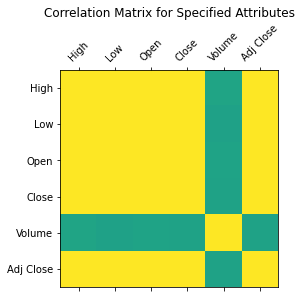

In [184]:
exploration_data(apple)

Below we have the exploration for all stocks

For Amazon
HEAD:
 [Row(Date=datetime.datetime(2017, 1, 3, 0, 0), High=758.760009765625, Low=747.7000122070312, Open=757.9199829101562, Close=753.6699829101562, Volume=3521100.0, Adj Close=753.6699829101562, company_name='AMAZON'), Row(Date=datetime.datetime(2017, 1, 4, 0, 0), High=759.6799926757812, Low=754.2000122070312, Open=758.3900146484375, Close=757.1799926757812, Volume=2510500.0, Adj Close=757.1799926757812, company_name='AMAZON'), Row(Date=datetime.datetime(2017, 1, 5, 0, 0), High=782.4000244140625, Low=760.260009765625, Open=761.5499877929688, Close=780.4500122070312, Volume=5830100.0, Adj Close=780.4500122070312, company_name='AMAZON'), Row(Date=datetime.datetime(2017, 1, 6, 0, 0), High=799.4400024414062, Low=778.47998046875, Open=782.3599853515625, Close=795.989990234375, Volume=5986200.0, Adj Close=795.989990234375, company_name='AMAZON'), Row(Date=datetime.datetime(2017, 1, 9, 0, 0), High=801.77001953125, Low=791.77001953125, Open=798.0, Close=796.9199829101562, Volume=34

/tmp/ipykernel_7121/2961435465.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_7121/2961435465.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



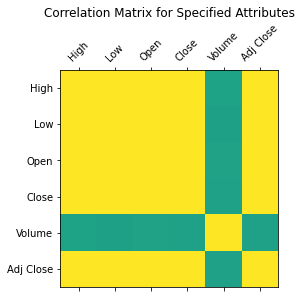

For Apple
HEAD:
 [Row(Date=datetime.datetime(2017, 1, 3, 0, 0), High=29.082500457763672, Low=28.690000534057617, Open=28.950000762939453, Close=29.037500381469727, Volume=115127600.0, Adj Close=27.277639389038086, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 4, 0, 0), High=29.127500534057617, Low=28.9375, Open=28.962499618530273, Close=29.0049991607666, Volume=84472400.0, Adj Close=27.247108459472656, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 5, 0, 0), High=29.21500015258789, Low=28.952499389648438, Open=28.979999542236328, Close=29.15250015258789, Volume=88774400.0, Adj Close=27.38566780090332, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 6, 0, 0), High=29.540000915527344, Low=29.11750030517578, Open=29.19499969482422, Close=29.477500915527344, Volume=127007600.0, Adj Close=27.69097137451172, company_name='APPLE'), Row(Date=datetime.datetime(2017, 1, 9, 0, 0), High=29.857500076293945, Low=29.485000610351562, Open=29.487499237060547, Close=2

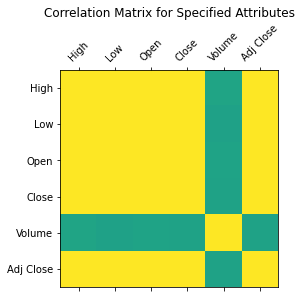

For Facebook
HEAD:
 [Row(Date=datetime.datetime(2017, 1, 3, 0, 0), High=117.83999633789062, Low=115.51000213623047, Open=116.02999877929688, Close=116.86000061035156, Volume=20663900.0, Adj Close=116.86000061035156, company_name='FACEBOOK'), Row(Date=datetime.datetime(2017, 1, 4, 0, 0), High=119.66000366210938, Low=117.29000091552734, Open=117.55000305175781, Close=118.69000244140625, Volume=19630900.0, Adj Close=118.69000244140625, company_name='FACEBOOK'), Row(Date=datetime.datetime(2017, 1, 5, 0, 0), High=120.94999694824219, Low=118.31999969482422, Open=118.86000061035156, Close=120.66999816894531, Volume=19492200.0, Adj Close=120.66999816894531, company_name='FACEBOOK'), Row(Date=datetime.datetime(2017, 1, 6, 0, 0), High=123.87999725341797, Low=120.02999877929688, Open=120.9800033569336, Close=123.41000366210938, Volume=28545300.0, Adj Close=123.41000366210938, company_name='FACEBOOK'), Row(Date=datetime.datetime(2017, 1, 9, 0, 0), High=125.43000030517578, Low=123.04000091552734, O

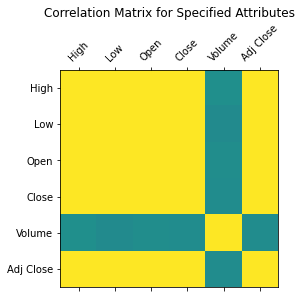

For Google
HEAD:
 [Row(Date=datetime.datetime(2017, 1, 3, 0, 0), High=789.6300048828125, Low=775.7999877929688, Open=778.8099975585938, Close=786.1400146484375, Volume=1657300.0, Adj Close=786.1400146484375, company_name='GOOGLE'), Row(Date=datetime.datetime(2017, 1, 4, 0, 0), High=791.3400268554688, Low=783.1599731445312, Open=788.3599853515625, Close=786.9000244140625, Volume=1073000.0, Adj Close=786.9000244140625, company_name='GOOGLE'), Row(Date=datetime.datetime(2017, 1, 5, 0, 0), High=794.47998046875, Low=785.02001953125, Open=786.0800170898438, Close=794.02001953125, Volume=1335200.0, Adj Close=794.02001953125, company_name='GOOGLE'), Row(Date=datetime.datetime(2017, 1, 6, 0, 0), High=807.9000244140625, Low=792.2039794921875, Open=795.260009765625, Close=806.1500244140625, Volume=1640200.0, Adj Close=806.1500244140625, company_name='GOOGLE'), Row(Date=datetime.datetime(2017, 1, 9, 0, 0), High=809.9660034179688, Low=802.8300170898438, Open=806.4000244140625, Close=806.65002441406

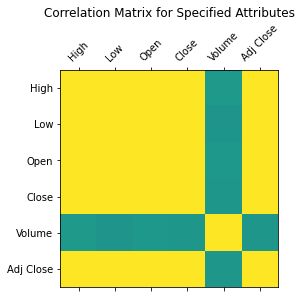

For Microsoft
HEAD:
 [Row(Date=datetime.datetime(2017, 1, 3, 0, 0), High=62.84000015258789, Low=62.130001068115234, Open=62.790000915527344, Close=62.58000183105469, Volume=20694100.0, Adj Close=58.67324447631836, company_name='MICROSOFT'), Row(Date=datetime.datetime(2017, 1, 4, 0, 0), High=62.75, Low=62.119998931884766, Open=62.47999954223633, Close=62.29999923706055, Volume=21340000.0, Adj Close=58.41072463989258, company_name='MICROSOFT'), Row(Date=datetime.datetime(2017, 1, 5, 0, 0), High=62.65999984741211, Low=62.029998779296875, Open=62.189998626708984, Close=62.29999923706055, Volume=24876000.0, Adj Close=58.41072463989258, company_name='MICROSOFT'), Row(Date=datetime.datetime(2017, 1, 6, 0, 0), High=63.150001525878906, Low=62.040000915527344, Open=62.29999923706055, Close=62.84000015258789, Volume=19922900.0, Adj Close=58.917015075683594, company_name='MICROSOFT'), Row(Date=datetime.datetime(2017, 1, 9, 0, 0), High=63.08000183105469, Low=62.540000915527344, Open=62.759998321533

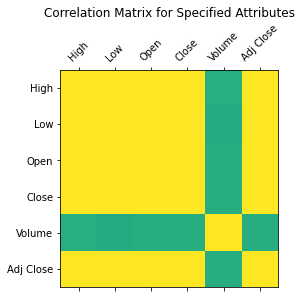

For Tesla
HEAD:
 [Row(Date=datetime.datetime(2017, 1, 3, 0, 0), High=44.066001892089844, Low=42.19200134277344, Open=42.97200012207031, Close=43.39799880981445, Volume=29616500.0, Adj Close=43.39799880981445, company_name='TESLA'), Row(Date=datetime.datetime(2017, 1, 4, 0, 0), High=45.599998474121094, Low=42.86199951171875, Open=42.95000076293945, Close=45.39799880981445, Volume=56067500.0, Adj Close=45.39799880981445, company_name='TESLA'), Row(Date=datetime.datetime(2017, 1, 5, 0, 0), High=45.49599838256836, Low=44.38999938964844, Open=45.284000396728516, Close=45.349998474121094, Volume=29558500.0, Adj Close=45.349998474121094, company_name='TESLA'), Row(Date=datetime.datetime(2017, 1, 6, 0, 0), High=46.0620002746582, Low=45.09000015258789, Open=45.38600158691406, Close=45.801998138427734, Volume=27639500.0, Adj Close=45.801998138427734, company_name='TESLA'), Row(Date=datetime.datetime(2017, 1, 9, 0, 0), High=46.38399887084961, Low=45.599998474121094, Open=45.79399871826172, Close=

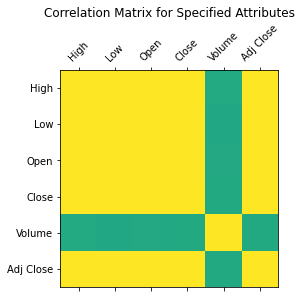

For Zoom
HEAD:
 [Row(Date=datetime.datetime(2019, 4, 18, 0, 0), High=66.0, Low=60.32099914550781, Open=65.0, Close=62.0, Volume=25764700.0, Adj Close=62.0, company_name='ZOOM'), Row(Date=datetime.datetime(2019, 4, 22, 0, 0), High=68.9000015258789, Low=59.939998626708984, Open=61.0, Close=65.69999694824219, Volume=9949700.0, Adj Close=65.69999694824219, company_name='ZOOM'), Row(Date=datetime.datetime(2019, 4, 23, 0, 0), High=74.16899871826172, Low=65.55000305175781, Open=66.87000274658203, Close=69.0, Volume=6786500.0, Adj Close=69.0, company_name='ZOOM'), Row(Date=datetime.datetime(2019, 4, 24, 0, 0), High=71.5, Low=63.15999984741211, Open=71.4000015258789, Close=63.20000076293945, Volume=4973500.0, Adj Close=63.20000076293945, company_name='ZOOM'), Row(Date=datetime.datetime(2019, 4, 25, 0, 0), High=66.8499984741211, Low=62.599998474121094, Open=64.73999786376953, Close=65.0, Volume=3863300.0, Adj Close=65.0, company_name='ZOOM'), Row(Date=datetime.datetime(2019, 4, 26, 0, 0), High=6

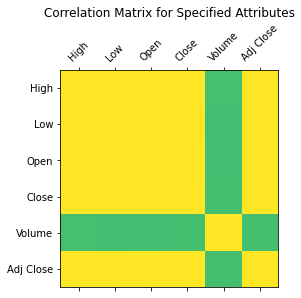

In [185]:
for key, df in all_data.items():
    print("For", key)
    exploration_data(df)

Now let's compute the average of the opening and closing prices 

In [145]:
def average_open_close(df, type=None, date=None):
    # if no date is given we set it by default (the first date)
    if not date:
        date = df.head().Date

    week = 0
    if type == "week":
        week = 1
    elif type == "month":
        week = 4
    elif type == "year":
        week = 52

    if week != 0:
        res = df.select('Open', 'Close').filter(df.Date < date + timedelta(weeks=week))
    else:
        res = df.select('Open', 'Close').filter(df.Date >= date)
        
    res = res.withColumn('Result', f.abs(df['Close'] - df['Open']))
    res.select((f.mean('Result'))).show()

Here is an exemple on Google's stocks

In [146]:
average_open_close(google, "year", google.head(50)[-1].Date)
average_open_close(google, "week", google.head(50)[-1].Date)
average_open_close(google, "month", google.head(50)[-1].Date)

+----------------+
|     avg(Result)|
+----------------+
|6.85836669921875|
+----------------+

+------------------+
|       avg(Result)|
+------------------+
|3.4611104329427085|
+------------------+

+-----------------+
|      avg(Result)|
+-----------------+
|3.577248393625453|
+-----------------+



Below we have the stocks for the whole period for all the stocks

In [147]:
for key, df in all_data.items():
    print("For", key)
    average_open_close(df)

For Amazon
+------------------+
|       avg(Result)|
+------------------+
|20.516507134249146|
+------------------+

For Apple
+------------------+
|       avg(Result)|
+------------------+
|0.6222130795742603|
+------------------+

For Facebook
+-----------------+
|      avg(Result)|
+-----------------+
|2.083495336221465|
+-----------------+

For Google
+------------------+
|       avg(Result)|
+------------------+
|11.485158191746612|
+------------------+

For Microsoft
+------------------+
|       avg(Result)|
+------------------+
|1.2453626151505213|
+------------------+

For Tesla
+------------------+
|       avg(Result)|
+------------------+
|2.5770397669396985|
+------------------+

For Zoom
+-----------------+
|      avg(Result)|
+-----------------+
|5.018949930975327|
+-----------------+



We now create a way to visualize the price evolution

In [148]:
def prices_evolution(df):
    df_pd = df.toPandas()

    fig = go.Figure(data=[go.Candlestick(x=df_pd['Date'],
                open=df_pd['Open'],
                high=df_pd['High'],
                low=df_pd['Low'],
                close=df_pd['Adj Close'])])

    fig.show()

Let's visualize the evolution for Facebook

In [149]:
prices_evolution(facebook)

We create a function that computes the daily return

In [150]:
def daily_return(df):
    res = df.withColumn("daily_return", df['Close'] -  df['Open'])
    return res

We call it on Facebook's stocks

In [151]:
daily_return(facebook).show()

+-------------------+------+------+------+------+---------+---------+------------+------------+
|               Date|  High|   Low|  Open| Close|   Volume|Adj Close|company_name|daily_return|
+-------------------+------+------+------+------+---------+---------+------------+------------+
|2017-01-03 00:00:00|117.84|115.51|116.03|116.86|2.06639E7|   116.86|    FACEBOOK|  0.83000183|
|2017-01-04 00:00:00|119.66|117.29|117.55|118.69|1.96309E7|   118.69|    FACEBOOK|   1.1399994|
|2017-01-05 00:00:00|120.95|118.32|118.86|120.67|1.94922E7|   120.67|    FACEBOOK|   1.8099976|
|2017-01-06 00:00:00|123.88|120.03|120.98|123.41|2.85453E7|   123.41|    FACEBOOK|   2.4300003|
|2017-01-09 00:00:00|125.43|123.04|123.55| 124.9|2.28804E7|    124.9|    FACEBOOK|   1.3499985|
|2017-01-10 00:00:00| 125.5|124.28|124.82|124.35|1.73246E7|   124.35|    FACEBOOK| -0.47000122|
|2017-01-11 00:00:00|126.12|124.06|124.35|126.09|1.83565E7|   126.09|    FACEBOOK|   1.7399979|
|2017-01-12 00:00:00|126.73| 124.8|125.6

We search for the best daily return

In [152]:
def best_daily_return():
    max_daily_result = []
    for _, df in all_data.items():
        res = daily_return(df)
        max_daily_result.append(float(res.select(f.max('daily_return')).collect()[0][0]))

    print("All the maximum: ", max_daily_result)
    print("The maximum: ", max(max_daily_result))

We search for the average daily return for one stocks

In [153]:
def average_daily_return(df, type=None, date=None):
    df_daily_return = daily_return(df)
    # if no date is given we set it by default (the first date)
    if not date:
        date = df.head().Date

    week = 0
    if type == "week":
        week = 1
    elif type == "month":
        week = 4
    elif type == "year":
        week = 52

    if week != 0:
        res = df_daily_return.select('daily_return').filter(df_daily_return.Date < date + timedelta(weeks=week))
    else:
        res = df_daily_return.select('daily_return').filter(df_daily_return.Date >= date)
        
    return res.select((f.mean('daily_return')))

We take the example of Zoom's stocks

In [154]:
average_daily_return(zoom, "week").show()

+-------------------+
|  avg(daily_return)|
+-------------------+
|-1.0925016403198242|
+-------------------+



We now visualize the average daily return for all stocks

In [155]:
for key, df in all_data.items():
    print("For", key)
    average_daily_return(df).show()

For Amazon
+-------------------+
|  avg(daily_return)|
+-------------------+
|-0.4772169428151912|
+-------------------+

For Apple
+-------------------+
|  avg(daily_return)|
+-------------------+
|0.04686345541972399|
+-------------------+

For Facebook
+-------------------+
|  avg(daily_return)|
+-------------------+
|0.10955422506747879|
+-------------------+

For Google
+------------------+
| avg(daily_return)|
+------------------+
|0.9289562530672176|
+------------------+

For Microsoft
+--------------------+
|   avg(daily_return)|
+--------------------+
|0.018912863224110704|
+--------------------+

For Tesla
+-------------------+
|  avg(daily_return)|
+-------------------+
|0.09252852775164047|
+-------------------+

For Zoom
+------------------+
| avg(daily_return)|
+------------------+
|0.2737035449693963|
+------------------+



# 2. Moving average

In [186]:
def moving_average(df, column_name='Open', nb_period=5):
    w = (Window.orderBy(f.col("Date").cast('long')).rangeBetween(-nb_period * 86400, 0))
    df.withColumn("moving_average",  f.avg(column_name).over(w)).show()


Let's check the moving average for Apple

In [187]:
moving_average(apple, 'Close', 10)
moving_average(apple, nb_period=3)

+-------------------+-------+-------+-------+-------+----------+---------+------------+------------------+
|               Date|   High|    Low|   Open|  Close|    Volume|Adj Close|company_name|    moving_average|
+-------------------+-------+-------+-------+-------+----------+---------+------------+------------------+
|2017-01-03 00:00:00|29.0825|  28.69|  28.95|29.0375|1.151276E8| 27.27764|       APPLE|29.037500381469727|
|2017-01-04 00:00:00|29.1275|28.9375|28.9625| 29.005| 8.44724E7|27.247108|       APPLE|29.021249771118164|
|2017-01-05 00:00:00| 29.215|28.9525|  28.98|29.1525| 8.87744E7|27.385668|       APPLE| 29.06499989827474|
|2017-01-06 00:00:00|  29.54|29.1175| 29.195|29.4775|1.270076E8|27.690971|       APPLE| 29.16812515258789|
|2017-01-09 00:00:00|29.8575| 29.485|29.4875|29.7475|1.342476E8|27.944603|       APPLE| 29.28400001525879|
|2017-01-10 00:00:00| 29.845| 29.575|29.6925|29.7775| 9.78484E7|27.972786|       APPLE|29.366250038146973|
|2017-01-11 00:00:00|29.9825|  29.65|

22/05/19 17:48:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/19 17:48:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/19 17:48:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/19 17:48:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/19 17:48:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/19 17:48:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


We check the correlation between two stocks for one column

In [158]:
def corr_two_stocks_col(df1, df2, column):
    df1 = df1.withColumnRenamed(column, "col")
    res = df1.join(df2, (df1.Date == df2.Date))
    return res.corr("col", column)
    

We check the correlation for one column between all the stocks

In [192]:
def corr_all_stocks(column):
    list_data = list(all_data.items())
    corr = np.empty([len(list_data), len(list_data)])
    for i in range(0, len(list_data)):
       for j in range(i, len(list_data)):
           res = corr_two_stocks_col(list_data[i][1], list_data[j][1], column)
           corr[i, j] = res
           corr[j, i] = res
    col = list(all_data.keys())

    fig=plt.figure(234)
    ax=fig.add_subplot(111)
    ax.set_title(f"Correlation matrix for {column} between two stocks")
    ax.set_xticklabels([''] + col, rotation=45)
    ax.set_yticklabels([''] + col)
    cax=ax.matshow(corr,vmax=1,vmin=-1)
    plt.show()

Let's take the example of the Volume

/tmp/ipykernel_7121/2665185351.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_7121/2665185351.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



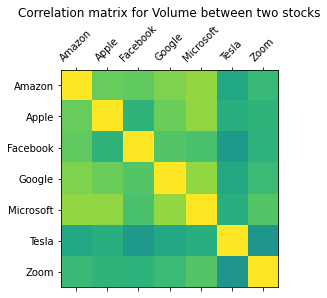

In [193]:
corr_all_stocks('Volume')

We now compute the average return rate

In [161]:
def average_return_rate(df, type="week", date=None):
    # if no date is given we set it by default (the first date)
    if not date:
        date = df.head().Date

    if type == "week":
        week = 1
    elif type == "month":
        week = 4
    else:
        week = 52

    current_rate = df.select('Adj Close').filter(df.Date == (date + timedelta(weeks=week))).collect()[0][0]
    initial_rate = df.select('Adj Close').filter(df.Date == date).collect()[0][0]

    return 100 * (current_rate - initial_rate)/initial_rate
    
average_return_rate(google)

2.372346278194035

Let's find the best return rate

In [162]:
def best_return_rate(type="month", date=None):
    rates = []
    for _, df in all_data.items():
        rate = average_return_rate(df, type, date)
        rates.append(rate)
    print("The best return rate is", max(rates), "%")

best_return_rate()

The best return rate is 34.51613149335307 %


# 8 Insights

We are going to work on the Microsoft dataset

In [163]:
df = microsoft.toPandas()

First we are going to see the evolution of the Price in time

(array([17167., 17348., 17532., 17713., 17897., 18078., 18262., 18444.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

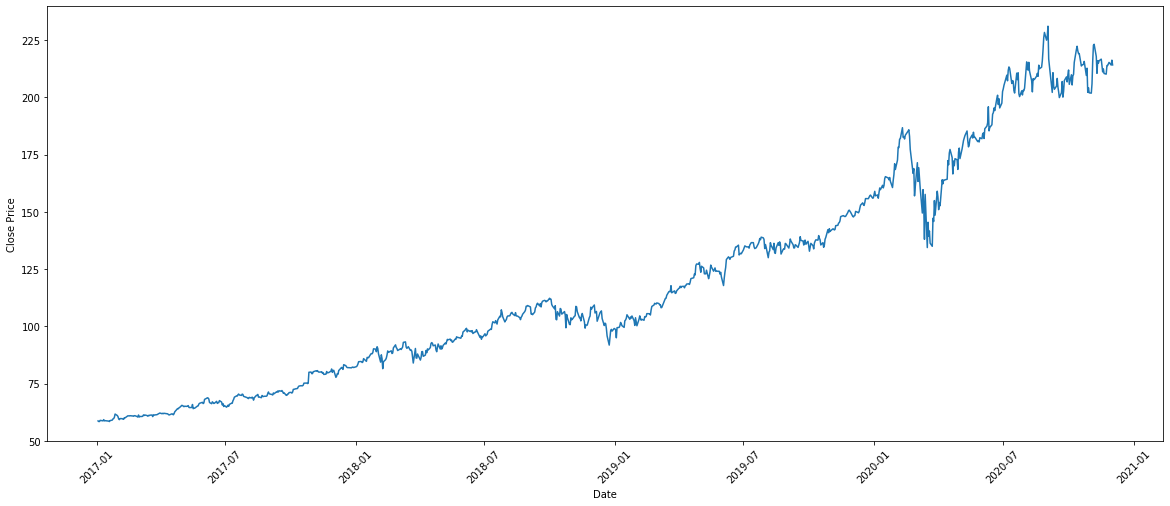

In [164]:
plt.figure(figsize=(20,8))
plt.plot('Date','Adj Close',data=df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

### Portfolio management and optimization

First let's  calculate the variance for all of our databases, it's a great indicator of how volatile an investement is.

In [165]:

variances = {}
for key, df in all_data.items():
    val =  df.select(f.variance("Adj Close")).collect()[0][0]
    print("For", key, "the variance is:", val)
    variances[key] = val
    

For Amazon the variance is: 430280.3810174088
For Apple the variance is: 576.1353031884762
For Facebook the variance is: 1341.0371551512023
For Google the variance is: 46416.9772285865
For Microsoft the variance is: 2187.41312875795
For Tesla the variance is: 11728.388249453665
For Zoom the variance is: 19227.591211773324


Now let's compute the volatility of each database. It alows us to have a degree of variation of the trading prives over time.

In [166]:
volatilities = {}
for key, val in variances.items():
    res = np.sqrt(val * all_data[key].count())
    print("For", key, "the volatility is:", res)
    volatilities[key] = res
    

For Amazon the volatility is: 20607.92896106211
For Apple the volatility is: 754.0858997800092
For Facebook the volatility is: 1150.4797573769981
For Google the volatility is: 6768.571232144556
For Microsoft the volatility is: 1469.3456904636487
For Tesla the volatility is: 3402.340253738707
For Zoom the volatility is: 2811.145671792701


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Amazon'),
  Text(1, 0, 'Apple'),
  Text(2, 0, 'Facebook'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Microsoft'),
  Text(5, 0, 'Tesla'),
  Text(6, 0, 'Zoom')])

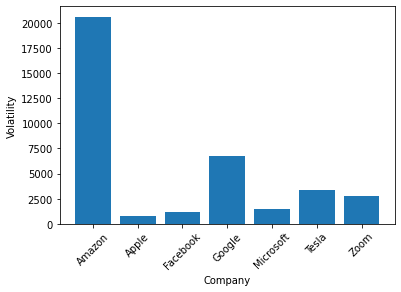

In [167]:
plt.bar(range(7), volatilities.values(), tick_label=list(volatilities.keys()))
plt.xlabel('Company')
plt.ylabel('Volatility')
plt.xticks(rotation=45)

We are going to compute the optimal risky portfolio

In [132]:
for key, df in all_data.items():
    val= average_daily_return(df).collect()[0][0]
    print("For ", key, 'the weight is' , (val - 0.01) / volatilities[key])

For  amazon the weight is -2.3642207993620755e-05
For  apple the weight is 4.8884955189426336e-05
For  facebook the weight is 8.653279158466418e-05
For  google the weight is 0.0001357681291293813
For  microsoft the weight is 6.065872232761149e-06
For  tesla the weight is 2.4256400476393536e-05
For  zoom the weight is 9.380643188128683e-05
